In [ ]:
!pip install onnx
!pip install onnxruntime

     |████████████████████████████████| 12.2MB 7.0MB/s 
     |████████████████████████████████| 4.1MB 8.6MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import onnxruntime as rt
import onnx

import numpy as np
import cv2

from os import listdir

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
modelFile = rt.InferenceSession("/content/drive/Shareddrives/ComputerVision/modelCheckpoint/50-doodleNet-v4-final.onnx")

In [ ]:
##create class_key

f = open('/content/drive/Shareddrives/ComputerVision/doodleDataset/50classList.txt','r')
categories = []
for l in f.readlines() :
  l = l.strip()
  l = l.replace("_"," ")
  categories.append(l)
f.close()
print(categories)

classes_to_index = dict()
for i in range(len(categories)):
  classes_to_index[categories[i]] = i
index_to_class = dict()
for k,v in classes_to_index.items() :
  index_to_class[v] = k

['alarm clock', 'anvil', 'apple', 'bat', 'bed', 'bucket', 'butterfly', 'camera', 'circle', 'cup', 'diamond', 'dog', 'dolphin', 'eye', 'finger', 'fish', 'flashlight', 'flip flops', 'frog', 'hamburger', 'hand', 'headphones', 'hexagon', 'ice cream', 'keyboard', 'light bulb', 'moon', 'mountain', 'nail', 'octagon', 'owl', 'pants', 'paper clip', 'parachute', 'pencil', 'pig', 'pineapple', 'pizza', 'potato', 'rabbit', 'rainbow', 'sailboat', 'skateboard', 'skull', 'smiley face', 'snake', 'snowflake', 'star', 'sun', 'teapot']


In [ ]:
def preprocess(inputImage):
  outputImage = cv2.cvtColor(inputImage, cv2.COLOR_GRAY2RGB)
  outputImage = cv2.resize(outputImage, (224,224))
  #mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
  #outputImage = train_transformations(image=outputImage)['image']
  outputImage = outputImage.astype(float)/255
  outputImage = (outputImage - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
  outputArray = np.expand_dims(outputImage.transpose((2,0,1)) ,axis=0 )
  #print(outputArray.shape)
  return outputArray
def softmax(arr):
  x = np.exp(arr)
  y = np.sum(x)
  return x/y

In [ ]:
img_list = listdir('/content/drive/Shareddrives/ComputerVision/6 handcraft testset')

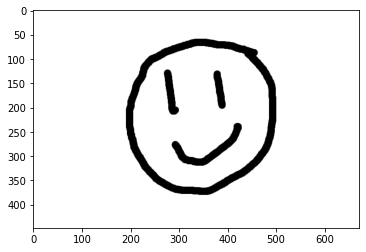

Label :  smiley face
Predicted :  smiley face  /  Probability :  0.9995498


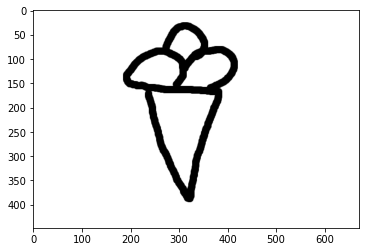

Label :  ice cream
Predicted :  ice cream  /  Probability :  0.99999386


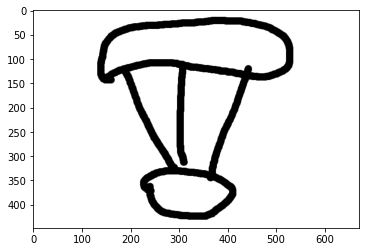

Label :  parachute
Predicted :  parachute  /  Probability :  0.9995705


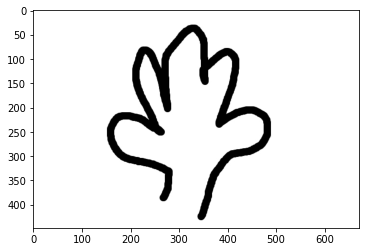

Label :  hand
Predicted :  hand  /  Probability :  0.99222755


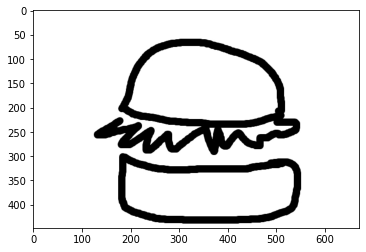

Label :  hamburger
Predicted :  hamburger  /  Probability :  0.99999017


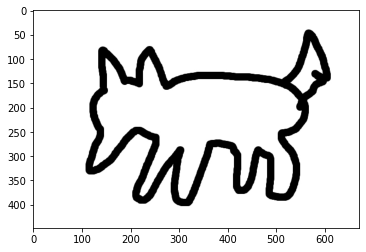

Label :  dog
Predicted :  dog  /  Probability :  0.9834096


In [ ]:
for test_img in img_list :
    inputImage0 = cv2.imread('/content/drive/Shareddrives/ComputerVision/6 handcraft testset/'+test_img,0)
    inputImage = cv2.bitwise_not(inputImage0)
    inputTensor = preprocess(inputImage).astype(float)

    plt.imshow(inputImage0, cmap='gray')
    plt.show()

    input_name = modelFile.get_inputs()[0].name
    label_name = modelFile.get_outputs()[0].name
    outputs = modelFile.run(None, {input_name: inputTensor.astype(np.float32)})
    
    pred = softmax(outputs[0][0]).argmax()
    confidence = softmax(outputs[0][0])[pred]
    print('Label : ', test_img[:-5])
    print('Predicted : ',index_to_class[pred], ' / ', 'Probability : ',confidence)